## Lab | Feature engineering

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv('C:/Users/Admin/Documents/ironhack/Week_7/Day_1/learningSet.csv')

C:\Users\Admin\AppData\Local\Temp\ipykernel_10324\2213626359.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('C:/Users/Admin/Documents/ironhack/Week_7/Day_1/learningSet.csv')


#### Check for null values in the numerical columns.

In [4]:
data1 = data.copy()

In [5]:
numerical = data1.select_dtypes(np.number)
numerical_df = pd.DataFrame(numerical.isna().sum()/len(data)).reset_index()
numerical_df.columns = ['column_name', 'nulls_percentage']
numerical_df

,column_name,nulls_percentage
0,ODATEDW,0.000000
1,TCODE,0.000000
2,DOB,0.000000
3,AGE,0.248030
4,NUMCHLD,0.870184
...,...,...
402,TARGET_B,0.000000
403,TARGET_D,0.000000
404,HPHONE_D,0.000000
405,RFA_2F,0.000000


#### Use appropriate methods to clean the columns GEOCODE2, WEALTH1, ADI, DMA,and MSA.

In [6]:
#data1['GEOCODE2'].value_counts(dropna = False)
# we have 187 values that are unknown, 132 NaN
#categorise unknow values to 'other'

In [7]:
data1['GEOCODE2'] = data1['GEOCODE2'].apply(lambda x: x if x in ['A','B','C','D'] else 'other')
data1['GEOCODE2'].value_counts(dropna = False)

A        34484
B        28505
D        16580
C        15524
other      319
Name: GEOCODE2, dtype: int64

#### Categorising the WEALTH into 3 different parts

In [8]:
#check for missing values
data1['WEALTH1'].value_counts(dropna=False)

NaN    44732
9.0     7585
8.0     6793
7.0     6198
6.0     5825
5.0     5280
4.0     4810
3.0     4237
2.0     4085
1.0     3454
0.0     2413
Name: WEALTH1, dtype: int64

#### WELATH has null values, drop them and put them into bins

In [11]:
data1 = data1[data1['WEALTH1'].notna()]

In [14]:
#check for missing values again
data1['WEALTH1'].value_counts(dropna=False)

9.0    7585
8.0    6793
7.0    6198
6.0    5825
5.0    5280
4.0    4810
3.0    4237
2.0    4085
1.0    3454
0.0    2413
Name: WEALTH1, dtype: int64

In [17]:
# can we categorise the wealth ..?
binned_data = data1['WEALTH1'].value_counts(bins=3)
#lets put them into 3 categories
binned_data

(6.0, 9.0]                      20576
(3.0, 6.0]                      15915
(-0.009999999999999998, 3.0]    14189
Name: WEALTH1, dtype: int64

#### checking and updating the ADI and MSA fields

#### Replacing NULL values - ADI

In [18]:
data1[['ADI']].value_counts(dropna=False)

ADI  
13.0     3345
51.0     2628
65.0     1910
57.0     1537
197.0    1284
         ... 
161.0       1
261.0       1
287.0       1
651.0       1
139.0       1
Length: 201, dtype: int64

In [24]:
m = data1[data1['ADI'].notna()]['ADI'].mode()[0]
m

13.0

In [25]:
data1['ADI'] = data1['ADI'].fillna(m)

#### Replacing NULL values - MSA

In [19]:
data1['MSA'].value_counts(dropna=False)


0.0       9734
1600.0    2307
4480.0    2185
2160.0    1381
520.0     1108
          ... 
1303.0       1
5523.0       1
743.0        1
1480.0       1
7610.0       1
Name: MSA, Length: 288, dtype: int64

In [31]:
m = data1[data1['MSA'].notna()]['MSA'].mode()[0]
m

0.0

#### Use appropriate EDA technique where ever necessary.

In [26]:
# lets try to observe different distributions

<AxesSubplot:>

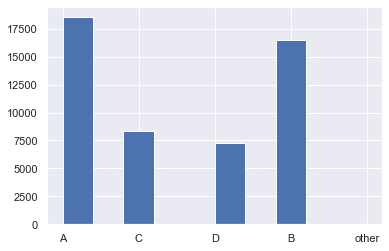

In [27]:
sns.set()
data1['GEOCODE2'].hist()

<AxesSubplot:>

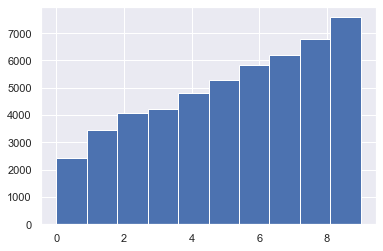

In [28]:
sns.set()
#fig, axes = plt.subplots(1, 2)
#sns.distplot(data=data1['WEALTH1'], x='X', y='counts', ax=axes[0])
#sns.distplot(data=binned_data, x='X', y='counts', ax=axes[1])

# without binning
data1['WEALTH1'].hist()

<AxesSubplot:>

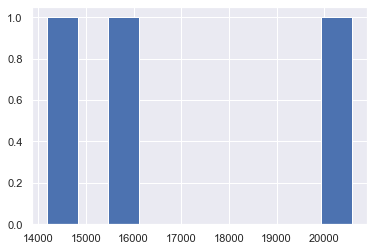

In [23]:
# with binning
# binned_data = data1['WEALTH1'].value_counts(bins=3)
binned_data.hist()


array([[<AxesSubplot:title={'center':'ADI'}>]], dtype=object)

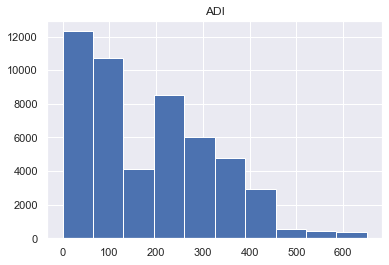

In [29]:
sns.set()
data1[['ADI']].hist()

array([[<AxesSubplot:title={'center':'MSA'}>]], dtype=object)

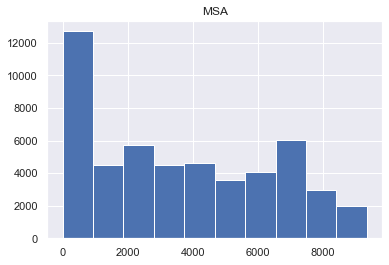

In [32]:
sns.set()
data1[['MSA']].hist()

<AxesSubplot:>

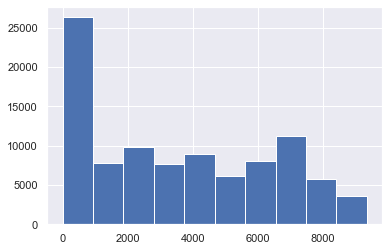

In [95]:
sns.set()
data1['MSA'].hist()

#### Resources

https://dfrieds.com/data-analysis/value-counts-python-pandas.html